## P2 Investigate a Dataset

For this project, I've decided to investigate a classic dataset: the Titanic passenger dataset. This dataset encompasses 891 individuals aboard the Titanic when it sailed that fateful day. It has has demographic, trip and economic data (in the form of fare price, cabin class, etc.).

I'll be following the data analysis process as outlined by the Udacity class:

<img src="files/images/data-analysis-process.png" height="200", width="500" align="left"></img>

## Question Phase

> What were the top predictors of survival?

*Decided to restrict it to this one question as it entails a lot more work than I expected.*

## Wrangling Phase (Cleaning the Data)

I wanted to first clean the data by doing the following:
- Checking if I loaded the CSV data correctly
- Check each series (column) for discrepancies
- Making sure each column in the DataFrame object had the right data type

In [91]:
import seaborn as sns, pandas as pd, matplotlib.pyplot as plt, numpy as np
%matplotlib inline

data = pd.read_csv('data/titanic-data.csv')

# Cursory glance to see if data loaded correctly
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
# Quick check at unique values for non-unique columns (i.e. excluding name and PassengerId).
# Did this to find and fix any easily visible anomalies. Found a few NaN values resulting from incorrect series dtypes.
print data.info()

# Personal note: dtype Object is apparently the value for str, kept trying to convert using df.apply() and df.astype()

'''for c in data.columns.values:
    if c == 'PassengerId' or c == 'Name':
        pass
    else:
        print c, "\n", data[c].unique(), '\n\n'
'''


# Correcting fact that[Age, Cabin, Embarked] all have NaN values

#Originally did data = data.fillna('') but this converted dtypes due to empty string not being valid for float, int
# Decided to leave as NaN, does not affect analysis

# Adding a new field, Cclass, which is a column with cabin class only
cclass_list = []
for i in data['Cabin']:
    if type(i)==float:
        cclass_list.append('')
    else:
        cclass_list.append(i[0:1])

data['Cclass'] = pd.Series(cclass_list, index=data.index)

# Personal note: saw other people's exploration of this data, found this interesting
# https://www.kaggle.com/mrisdal/titanic/exploring-survival-on-the-titanic
# Instead of filling in NaN values for 'Embarked' as '', she took the median fare for all 'Embarked' values and compared it with
# the fare for '' values. She concluded that '' fares fell squarely on 'C', so she filled '' with 'C'.
# She goes on to do very similar things for other fields with empty values; imputation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Cclass         891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
None


#### Few closing comments RE my first look at the data

> I don't think it's particularly useful to look at 'PassengerId', 'Name', 'Ticket' as predictors for survival so I'm excluding them in my analysis and conclusions. 'PassengerId' is pretty much another indexing field, 'Embarked' contains the same info you would want from 'Ticket' (prefixes of the ticket contain port of embarcation it seems, which is the very value in 'Embarked').
- Name: analyzing the origin of people's last names could give insight into whether different nationalities or ethnicities had higher survival rates.

## Explore Phase

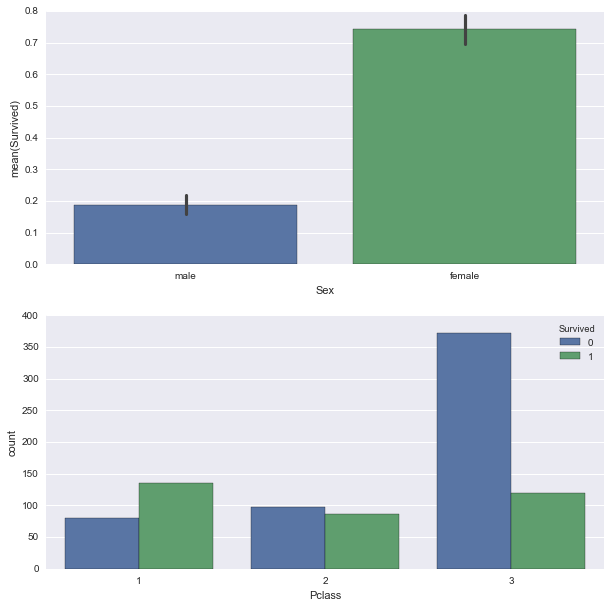

In [81]:
survived, pclass, sex, sibsp, parch, fare, embarked = data['Survived'], data['Pclass'], data['Sex'], data['SibSp'], data['Parch'], data['Fare'], data['Embarked']

# Surviving Males/All Males, Surviving Females/All Females
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10))

# sns.barplot performs an aggregation by calculating a statistic ()
sns.barplot(x=sex, y=survived, ax=ax1)

#sns.countplot(x=sex, hue=survived, ax=ax2)

sns.countplot(x=pclass, hue=survived, ax=ax2)